In [18]:
#Importing the required libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import imageio

In [19]:
# Set path to dataset images

image_path='ISL_Datasets/Dataset'

In [24]:
# Load folder into array-image_files and return the array 

def loadImages(path,label): 
  image_files=sorted([os.path.join(path,label,file)
   for file in os.listdir(path+str('/')+label) if file.endswith('.jpg')
  ])
  return image_files


In [23]:
# Function to display images

def display(img,title="Original"):
    plt.imshow(img,cmap='gray'),plt.title(title)
    plt.show()

In [25]:
# Preprocessing all the images to extract ROI i.e. hands


def preprocess_images(data, label):
    count = 0
    path = "ISL_Recognition/Preprocessed_Images/"

    # Create a directory for each label if it doesn't exist
    os.makedirs(os.path.join(path, label), exist_ok=True)

    for image in data:
        # Reading image
        img = imageio.imread(image)

        # Converting image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Converting image to HSV format
        hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Defining boundary level for skin color in HSV
        skin_color_lower = np.array([0, 40, 30], np.uint8)
        skin_color_upper = np.array([43, 255, 255], np.uint8)

        # Producing mask
        skin_mask = cv2.inRange(hsv_img, skin_color_lower, skin_color_upper)

        # Removing Noise from mask
        skin_mask = cv2.medianBlur(skin_mask, 5)
        skin_mask = cv2.addWeighted(skin_mask, 0.5, skin_mask, 0.5, 0.0)

        # Applying Morphological operations
        kernel = np.ones((5, 5), np.uint8)
        skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

        # Extracting hand by applying mask
        hand = cv2.bitwise_and(gray_img, gray_img, mask=skin_mask)

        # Get edges by Canny edge detection
        canny = cv2.Canny(hand, 60, 60)

        # Save preprocessed images
        final_path = os.path.join(path, label, f"{count}.png")
        cv2.imwrite(final_path, canny)
        count += 1

In [26]:
# Getting path to all images and preprocessing the images

signs=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for label in signs:
    images=[]
    images=loadImages(image_path,label)
    preprocess_images(images,label)

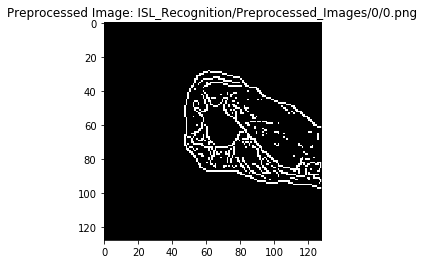

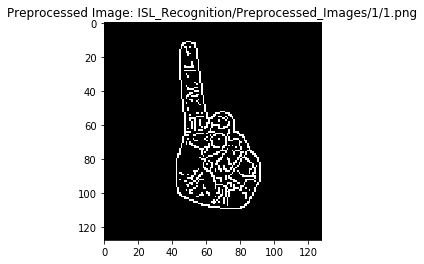

In [27]:
# Displaying a few preprocessed images
sample_images = [
    "ISL_Recognition/Preprocessed_Images/0/0.png",
    "ISL_Recognition/Preprocessed_Images/1/1.png",
]
for image_path in sample_images:
    img = mpimg.imread(image_path)
    display(img, title=f"Preprocessed Image: {image_path}")